### Tutorial 5 - Applied Machine Learning

Packages to install: 

* `scikit-learn`

### Question 1 - Classification

We'll use the classic Iris flower dataset available in scikit-learn.  
This data has features like Sepal length, Sepal width, Petal length, and Petal width, along with the target variable - the Iris flower species (Iris-setosa, Iris-versicolor, Iris-virginica). 

1. Import libraries
2. Load data:

```
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X = bc.data
y = bc.target
```

3. Split the dataset into training/validation/testing(80/10/10%) using `train_test_split` function
4. Initialize and train the SVM classifier
5. Predict and check the score on the validation set
6. Tune your SVM (hyper-parameters tuning) and
7. Evaluate your final model using testing set
8. Use `sklearn.metrics.confusion_matrix` to get the confusion matrix on the testing set
9. Use `sklearn.metrics.ConfusionMatrixDisplay` to plot the confusion matrix on the testing set.
10. Repeat the above steps (4 - onwards) with :
    * Random Forest (`sklearn.ensemble.RandomForestClassifier`)
    * Gradient Boosting (`sklearn.ensemble.GradientBoostingClassifier`) algorithm.
11. Compare the score of each models to get the best one.

In [1]:
%pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X = bc.data
y = bc.target

In [3]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#initialize and train svm classifier
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [6]:
#predict and check score on validation set
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM classifier on test set: {accuracy:.2f}")

Accuracy of SVM classifier on test set: 0.96


In [23]:
#tune svm
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
#best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score:.2f}")

Best parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.96


In [24]:
#Evaluate your final model using testing set
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



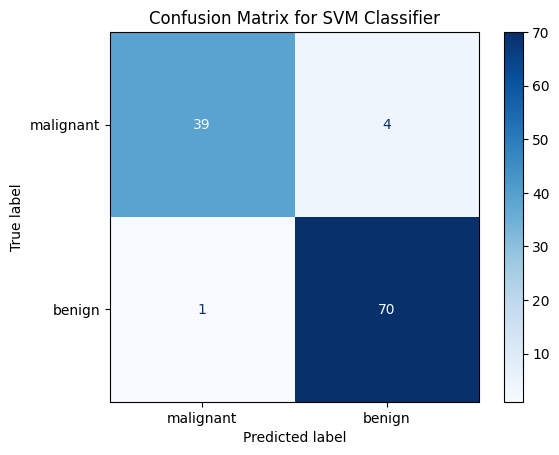

In [8]:
#Use `sklearn.metrics.ConfusionMatrixDisplay` to plot the confusion matrix on the testing set.
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=bc.target_names)
disp.plot(cmap='Blues')
import matplotlib.pyplot as plt
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

### Question 2 - Classification

Similar to Question 1, but this time, use the iris dataset (easier).  

```
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
```

Algorithms/Classifier to use:  
  
  * Decision Tree ( `sklearn.tree.DecisionTreeClassifier` )
  * K-Nearest Neighbor ( `sklearn.neighbors.KNeighborsClassifier` )

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [11]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
#initialize and train decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt.predict(X_test)
#predict and check score on validation set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree classifier on test set: {accuracy:.2f}")

Accuracy of Decision Tree classifier on test set: 1.00


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



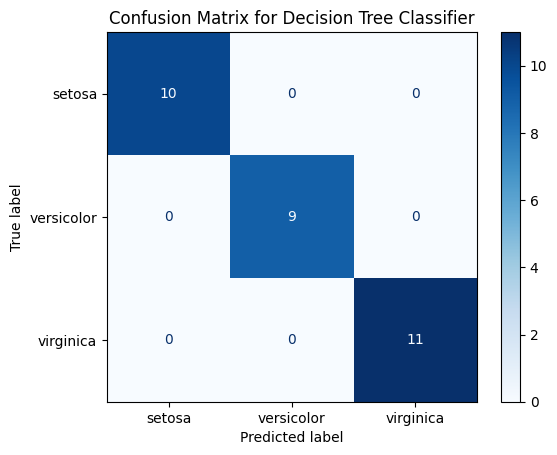

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=iris.target_names)
disp.plot(cmap='Blues')
import matplotlib.pyplot as plt
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
#initialize and train kneighbors classifier
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = kn.predict(X_test)
#predict and check score on validation set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNeighbours classifier on test set: {accuracy:.2f}")

Accuracy of KNeighbours classifier on test set: 1.00


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



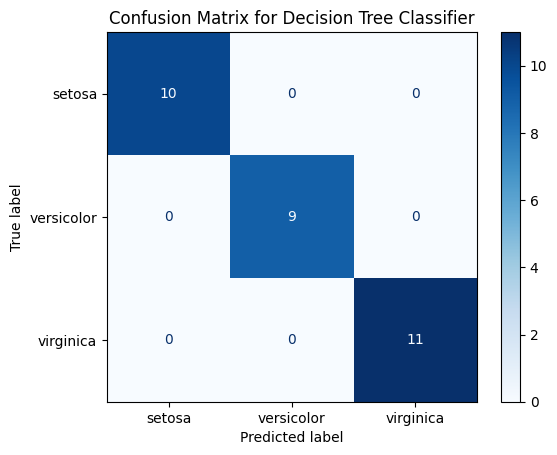

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=iris.target_names)
disp.plot(cmap='Blues')
import matplotlib.pyplot as plt
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Question 3 - Regression

Instead of classification, now lets do regression.
We are using the diabetes data:  

```
from sklearn.datasets import load_diabetes

db = load_diabetes()
X = db.data
y = db.target

```

Algoritmhs/Regressor to use:  

* Support Vector Machine ( `sklearn.svm.SVR` )
* Random Forest ( `sklearn.ensemble.RandomForestRegressor` )
* Gradient Boosting ( `sklearn.ensemble.GradientBoostingRegressor` )

In [ ]:
from sklearn.datasets import load_diabetes

db = load_diabetes()
X = db.data
y = db.target

In [ ]:
#Split the dataset into training/validation/testing(80/10/10%) using `train_test_split` function
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
#initialize and train support vector machine regressor
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

In [ ]:
#perform predictions on the validation set
y_val_pred = svr.predict(X_val)
#calculate the mean squared error on the validation set
from sklearn.metrics import mean_squared_error
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on validation set: {mse_val:.2f}")

In [ ]:
#perform predictions on the testing set
y_test_pred = svr.predict(X_test)
#calculate the mean squared error on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on test set: {mse_test:.2f}")